In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from helpers import load_data
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly
from plots import cross_validation_visualization

# Cross-Validation

In [2]:
# load dataset
x, y = load_data()

In [3]:
print(type(x))
print(len(x))
print(len(y))

<class 'numpy.ndarray'>
50
50


In [4]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [5]:
k_idx = build_k_indices(y, k_fold=6, seed=1)
print(np.shape(k_idx))
print(k_idx)

#NOTE: if len(y) is not a multiple of k_fold then some indices can get disarded.

(6, 8)
[[27 35 40 38  2  3 48 29]
 [46 31 32 39 21 36 19 42]
 [49 26 22 13 41 17 45 24]
 [23  4 33 14 30 10 28 44]
 [34 18 20 25  6  7 47  1]
 [16  0 15  5 11  9  8 12]]


In [6]:
hh = 2
k_idx_tmp = k_idx
k_idx_tmp = np.delete(k_idx_tmp, hh, 0)
(np.append([], [list(j) for j in k_idx_tmp])).astype(int)

array([27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39, 21, 36, 19, 42, 23,
        4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25,  6,  7, 47,  1, 16,  0,
       15,  5, 11,  9,  8, 12])

In [7]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    idx_tr = k_indices[k]
    idx_tmp = k_indices
    idx_tmp = np.delete(idx_tmp, k, 0)
    idx_te = (np.append([], [list(j) for j in idx_tmp])).astype(int)
    
    x_tr = x[idx_tr]
    x_te = x[idx_te]
    y_tr = y[idx_tr]
    y_te = y[idx_te]
    
    phi_tr = build_poly(x_tr, degree)
    phi_te = build_poly(x_te, degree)
    
    w = ridge_regression(y_tr, phi_tr, lambda_)
    
    rmse_tr = np.sqrt(2 * compute_mse(y_tr, phi_tr, w))
    rmse_te = np.sqrt(2 * compute_mse(y_te, phi_te, w))
    
    return rmse_tr, rmse_te

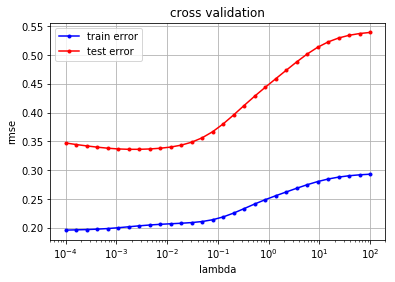

In [8]:
def cross_validation_demo(x, y):
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    for ll in lambdas:
        k_rmse_tr = np.array([])
        k_rmse_te = np.array([])
        for kk in range(k_fold):
            k_rmse_tr, k_rmse_te = cross_validation(y, x, k_indices, kk, ll, degree)
            k_rmse_tr = np.append(k_rmse_tr, k_rmse_tr)
            k_rmse_te = np.append(k_rmse_te, k_rmse_te)
        
        rmse_tr.append(np.mean(k_rmse_tr))
        rmse_te.append(np.mean(k_rmse_te))
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo(x, y)

## Bias-Variance Decomposition

In [ ]:
def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()